In [41]:
import pandas as pd  
import numpy as np  

# Import the dataset
df = pd.read_csv('./data/BigMartSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
 # Clean the data: check which columns contain NaN values in it 
    # (Once the code is executed, all the columns should give False)
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [43]:
# In case there are columns get True result, remove all the null values from that column:
df = df.fillna(method='ffill')

### Another way: Fill missing data
### df['Item_weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.849649,0.066132,140.992782,1997.831867,2181.288914
std,4.631020,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
x = df[['Item_Weight','Item_Visibility','Item_MRP']]
y = df['Item_Outlet_Sales']
x.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.000000,182.0950
4,8.93,0.000000,53.8614


In [45]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     1453.
Date:                Sat, 24 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:10:19   Log-Likelihood:                -73762.
No. Observations:                8523   AIC:                         1.475e+05
Df Residuals:                    8519   BIC:                         1.476e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             267.6073     58.822      4.549      0.000     152.303     382.912
Item_Weight         0.0915      3.248      0.028      0.978      -6.275       6.458
Item_Visibility -4229.2524    291.456    -14.511      0.000   -4800.576   -3657.929
Item_MRP           15.5483      0.242     64.377      0.000      15.075      16.022
==============================================================================
Omnibus:                      815.461   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1718.080
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       4.825   Cond. No.                     3.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(xTrain, yTrain)
yPred = lr.predict(xTest)

print('Predictions:', yPred[0:5])
print('Score:', lr.score(xTest,yTest))

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPred))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))
print('Variance score: %.2f' % r2_score(yTest, yPred))

print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Predictions: [2374.69233368 1237.45085445 2212.54501148 2496.2364099  3091.38581821]
Score: 0.3328485217056041
Mean Absolute Error: 1050.3747164202355
Mean Squared Error: 1952658.6107247176
Root Mean Squared Error: 1397.3756154752084
Variance score: 0.33
Intercept: 278.8370647348015
Coefficients: [ 0.00000000e+00 -6.28872423e-01 -4.16149084e+03  1.55385842e+01]


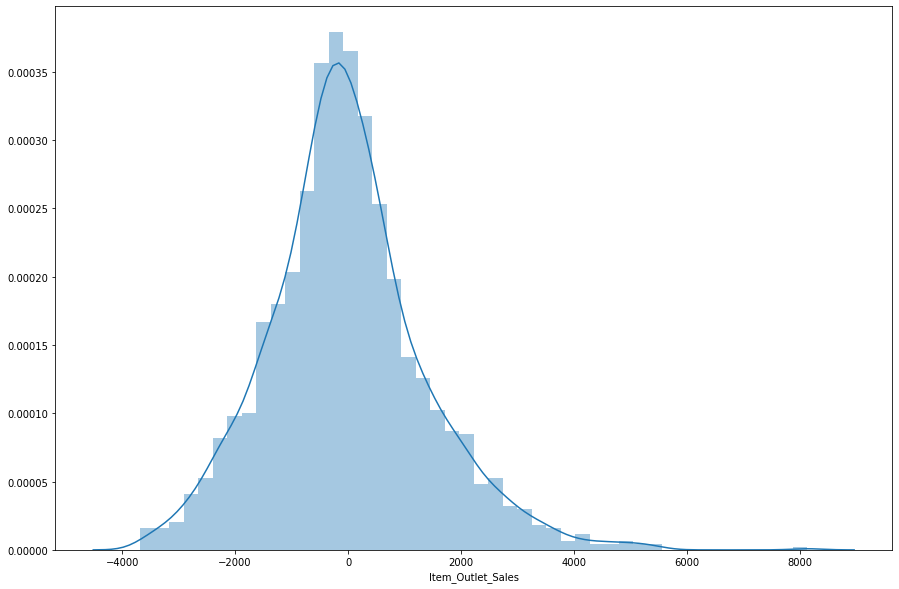

In [47]:
import matplotlib.pyplot as plot  
import seaborn as seabornInstance 

# Check the average value of the “Item_Outlet_Sales” column.
plot.figure(figsize=(15,10))
plot.tight_layout()
seabornInstance.distplot(yTest-yPred)

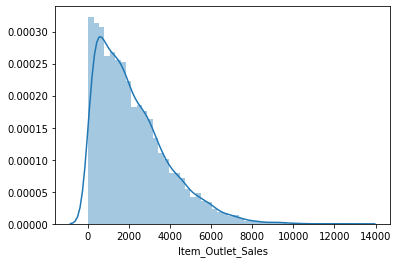

In [48]:
seabornInstance.distplot(df['Item_Outlet_Sales'])

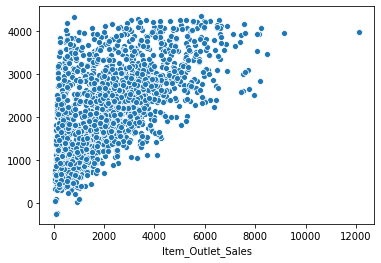

In [49]:
predictions = lr.predict(xTest)
# To check the quality of our model, let's plot it
seabornInstance.scatterplot(yTest, predictions)

In [50]:
# Split the dataset into the training set and test set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(xTrain, yTrain)
yPred = lr.predict(xTest)

df = pd.DataFrame({'Actual': yTest, 'Predicted': yPred})
df1=df.head(21)
df1

,Actual,Predicted
4931,1426.1436,2374.692334
4148,1201.7690,1237.450854
7423,1836.2764,2212.545011
4836,2410.8618,2496.236410
944,1549.9824,3091.385818
154,3169.2080,3611.483996
7230,2036.6822,1090.760211
3472,824.9262,1732.015420
2294,378.1744,2933.847078
2588,1573.9512,2018.482188


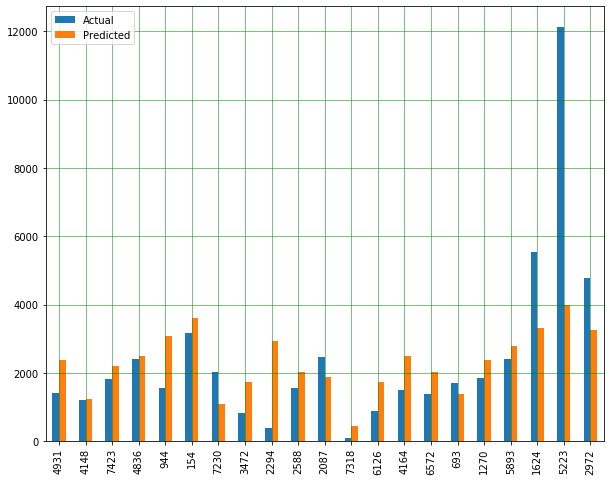

In [51]:
df1.plot(kind='bar',figsize=(10,8))
plot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plot.show()